In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
df_index=pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [33]:
#index price is output feature

In [6]:
df_index.describe()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,11.500000,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,7.071068,0.510754,3.526299,0.349527,0.33002,210.735341
min,0.000000,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,5.750000,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,11.500000,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,17.250000,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,23.000000,2017.000000,12.000000,2.750000,6.20000,1464.000000


In [7]:
df_index.count()

Unnamed: 0           24
year                 24
month                24
interest_rate        24
unemployment_rate    24
index_price          24
dtype: int64

In [9]:
df_index.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [21]:


df_index.drop(columns=["year","month"],axis=1,inplace=True)

In [22]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [25]:
import seaborn as sns

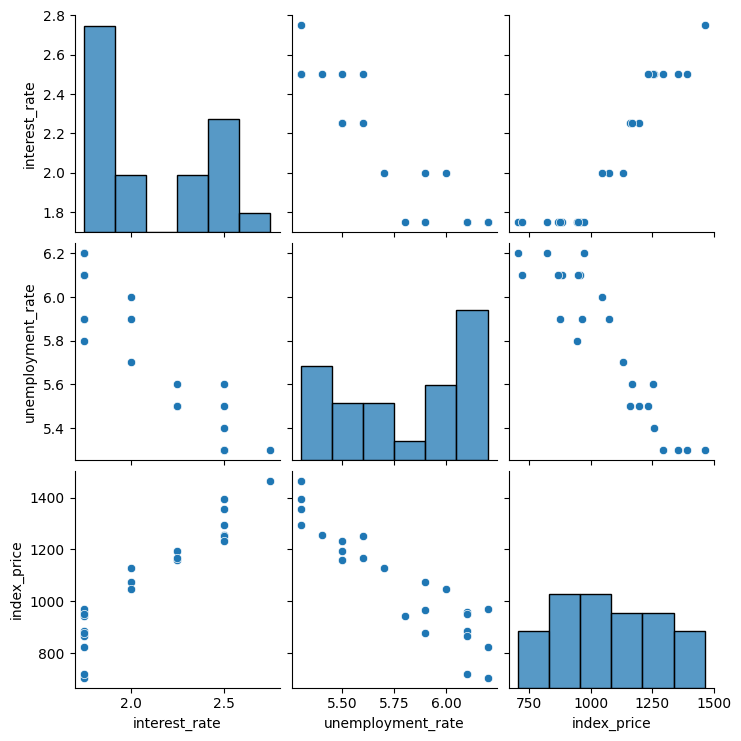

In [26]:
sns.pairplot(df_index)

In [27]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployement rate')

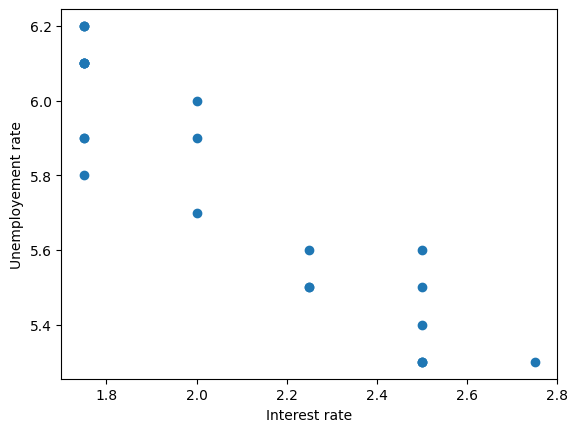

In [31]:
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"])
plt.xlabel("Interest rate")
plt.ylabel("Unemployement rate")

Text(0, 0.5, 'index_price')

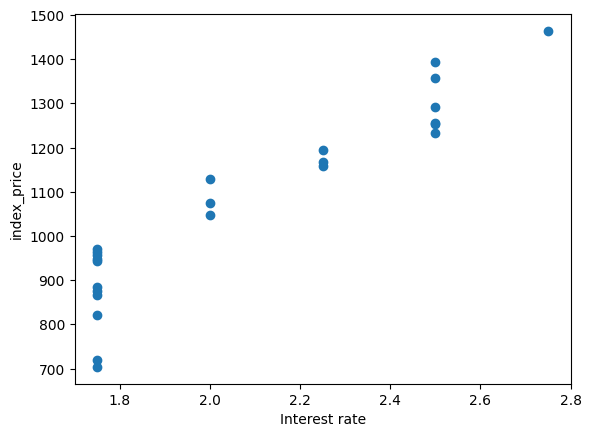

In [32]:
plt.scatter(df_index["interest_rate"],df_index["index_price"])
plt.xlabel("Interest rate")
plt.ylabel("index_price")

In [41]:
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [42]:

X[:5]

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [43]:
y[:5]

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

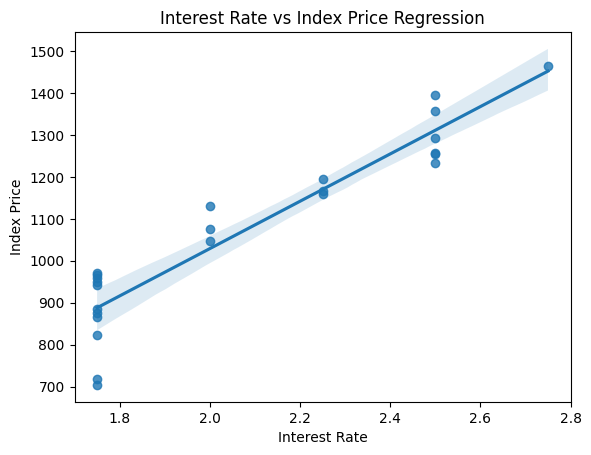

In [48]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)
plt.xlabel("Interest Rate")
plt.ylabel("Index Price")
plt.title("Interest Rate vs Index Price Regression")
plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler=StandardScaler()

In [52]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [55]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [57]:
regression.fit(X_train,y_train)

LinearRegression()

In [58]:
from sklearn.model_selection import cross_val_score

In [62]:

validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=4)

In [64]:
 validation_score

array([-2240.54883918, -8172.45799039, -8732.75278347, -1719.85743107])

In [65]:
y_pred=regression.predict(X_test)

In [66]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

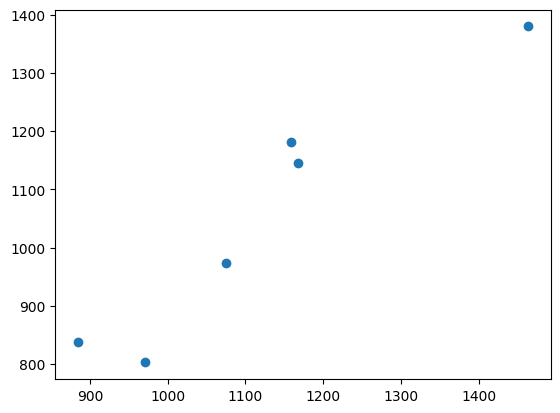

In [67]:
plt.scatter(y_test,y_pred)

In [69]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


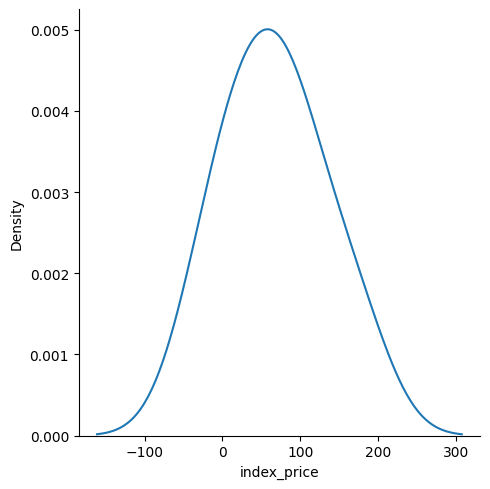

In [71]:
sns.displot(residuals,kind='kde')

In [73]:
print(regression.coef_)

[  88.27275507 -116.25716066]
